In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
data = pd.read_csv("SturmData.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          48 non-null     object 
 1   fips           48 non-null     int64  
 2   icpsr          48 non-null     int64  
 3   debtfree       47 non-null     float64
 4   effectivemwpa  47 non-null     float64
 5   earnings       44 non-null     float64
 6   wills          32 non-null     float64
 7   soletrader     31 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.1+ KB


In [4]:
data.head(n=10)

,state,fips,icpsr,debtfree,effectivemwpa,earnings,wills,soletrader
0,AL,1,41,1846.0,NaN,1887.0,NaN,NaN
1,AR,5,42,1835.0,1873.0,1873.0,1868.0,1868.0
2,AZ,4,61,1864.0,1871.0,1973.0,NaN,1871.0
3,CA,6,71,1850.0,1872.0,1872.0,1874.0,1872.0
4,CO,8,62,1861.0,1861.0,1861.0,1874.0,1874.0
5,CT,9,1,1845.0,1877.0,1877.0,1809.0,1877.0
6,DE,10,11,1865.0,1873.0,1873.0,NaN,NaN
7,FL,12,43,1845.0,1943.0,1892.0,1823.0,NaN
8,GA,13,44,1868.0,1873.0,1861.0,1867.0,NaN
9,IA,19,31,1846.0,1873.0,1873.0,NaN,1873.0


In [5]:
states = gpd.read_file("cb_2018_us_state_500k.shp")

In [6]:
states.head(n=10)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


The visualizations will focus on the mainland of the US

In [7]:
states = states[~states["NAME"].isin(["Puerto Rico", "American Samoa", "United States Virgin Islands", 
                                      "Hawaii", "Guam", "Commonwealth of the Northern Mariana Islands", "Alaska"])]

<Axes: >

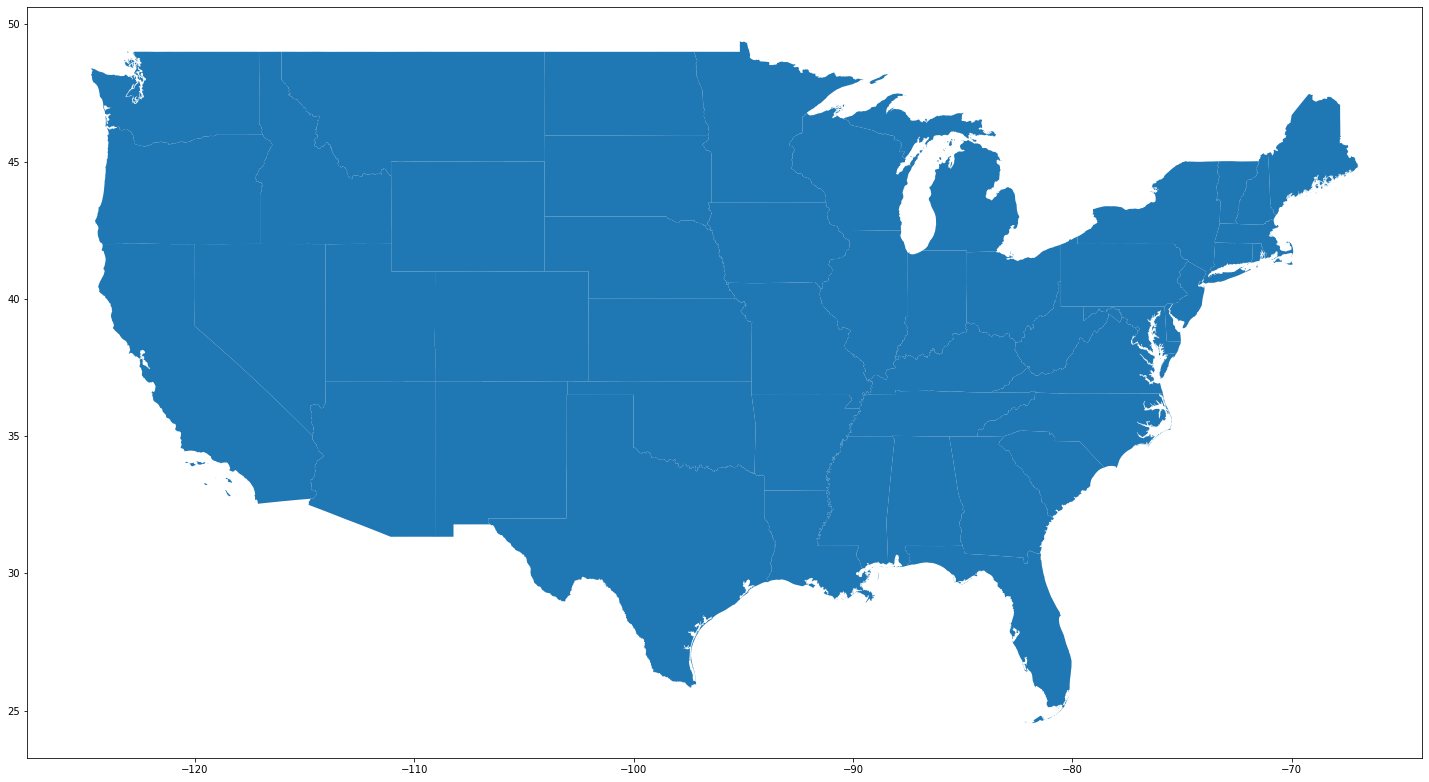

In [8]:
# Plot of the mainland of the US, no special coloring applied
fig = plt.figure(1, figsize=(25,15))
ax = fig.add_subplot()
states.plot(ax=ax)

In order to easily use both datasets, they should be merged

In [9]:
states_data = states.merge(data, left_on="STUSPS", right_on="state")

In [10]:
def plot_choropleth(size : tuple = (25,15), dataset : gpd.geodataframe.GeoDataFrame = states_data, 
                    label : str = "Title", column : str = ""):
    fig = plt.figure(1, figsize=size)
    ax = fig.add_subplot()
    states_data.plot(column=column, legend=True, ax=ax, 
                 missing_kwds={"color":"red", "edgecolor":"lightgray", "hatch": "XXX", "label": "Not approved"},
                legend_kwds = {"label": label, "orientation": "horizontal"})

In [11]:
type(states_data)

geopandas.geodataframe.GeoDataFrame

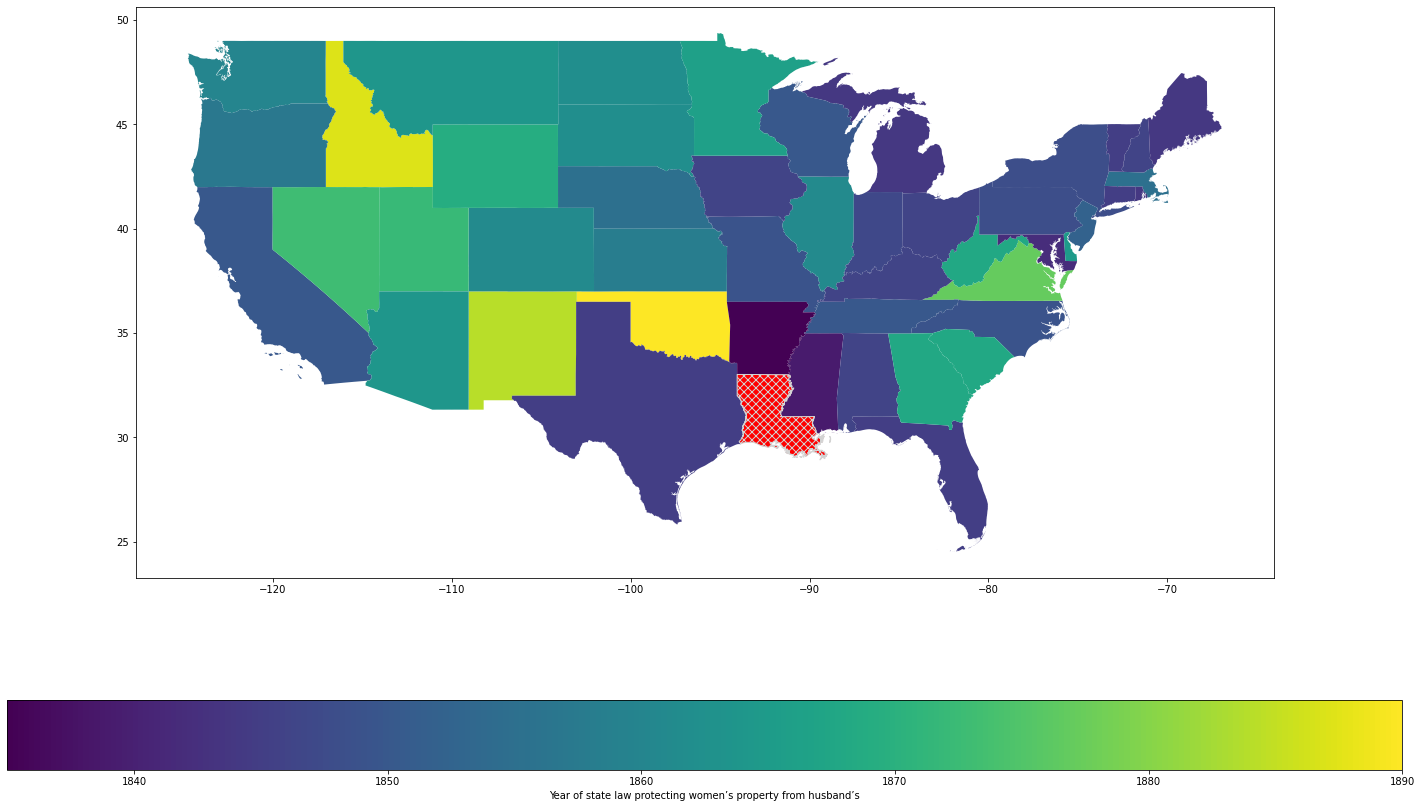

In [12]:
# Choropleth for debtfree column, which describes 
# the year of passage of state law protecting married women’s separate property from her husband’s debts
plot_choropleth(label = "Year of state law protecting women’s property from husband’s", column = "debtfree")

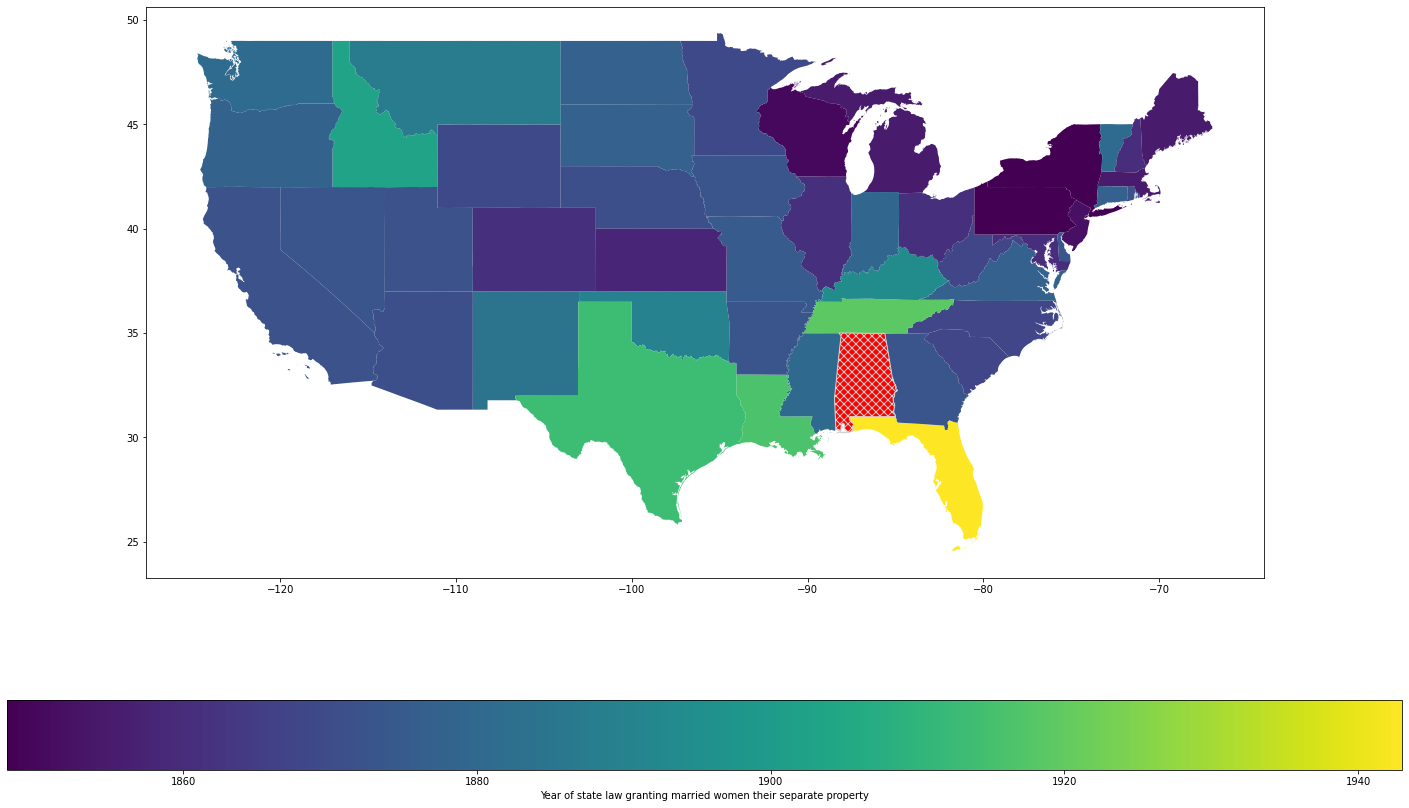

In [13]:
# Choropleth for effectivemwpa column, which describes 
# year of passage of state law granting married women control and management rights over their separate property
plot_choropleth(label = "Year of state law granting married women their separate property", column = "effectivemwpa")

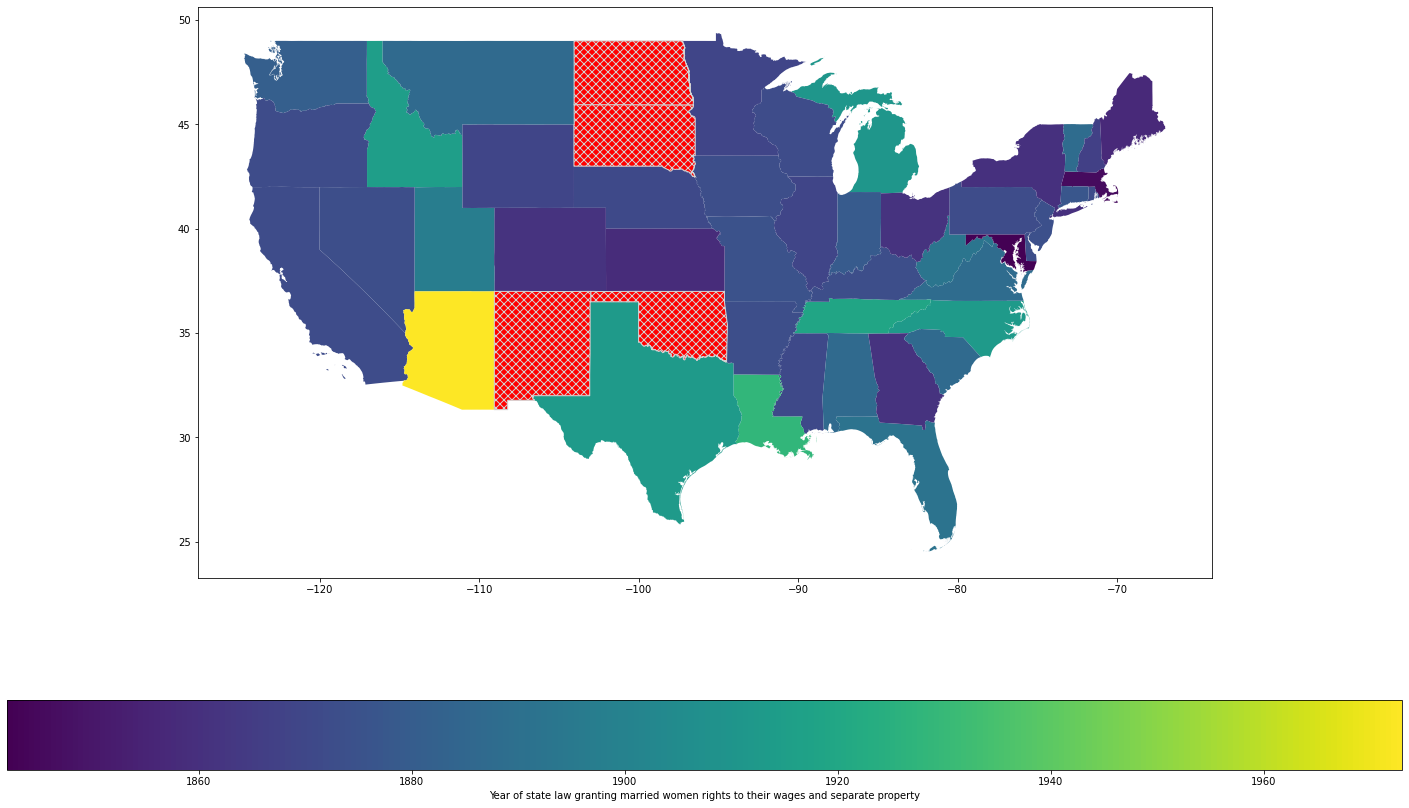

In [14]:
# Choropleth for earnings column, which describes 
# year of passage of state law granting married women ownership of their wages or earnings on par with other separate property
plot_choropleth(label = "Year of state law granting married women rights to their wages and separate property", column = "earnings")

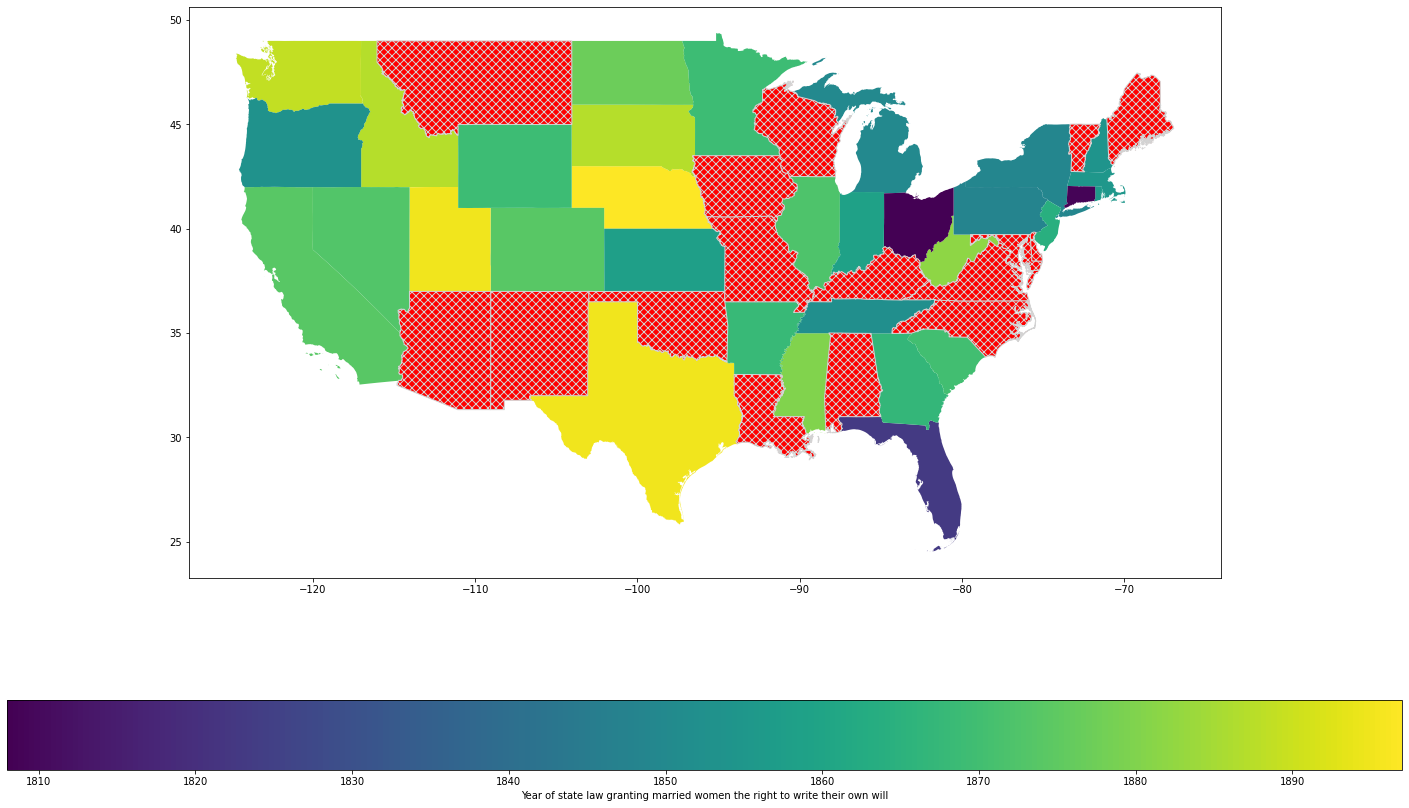

In [15]:
# Choropleth for wills column, which describes 
# Year of passage of state law granting married women the ability to write wills without their husband's consent or other restrictions
plot_choropleth(label = "Year of state law granting married women the right to write their own will", column = "wills")

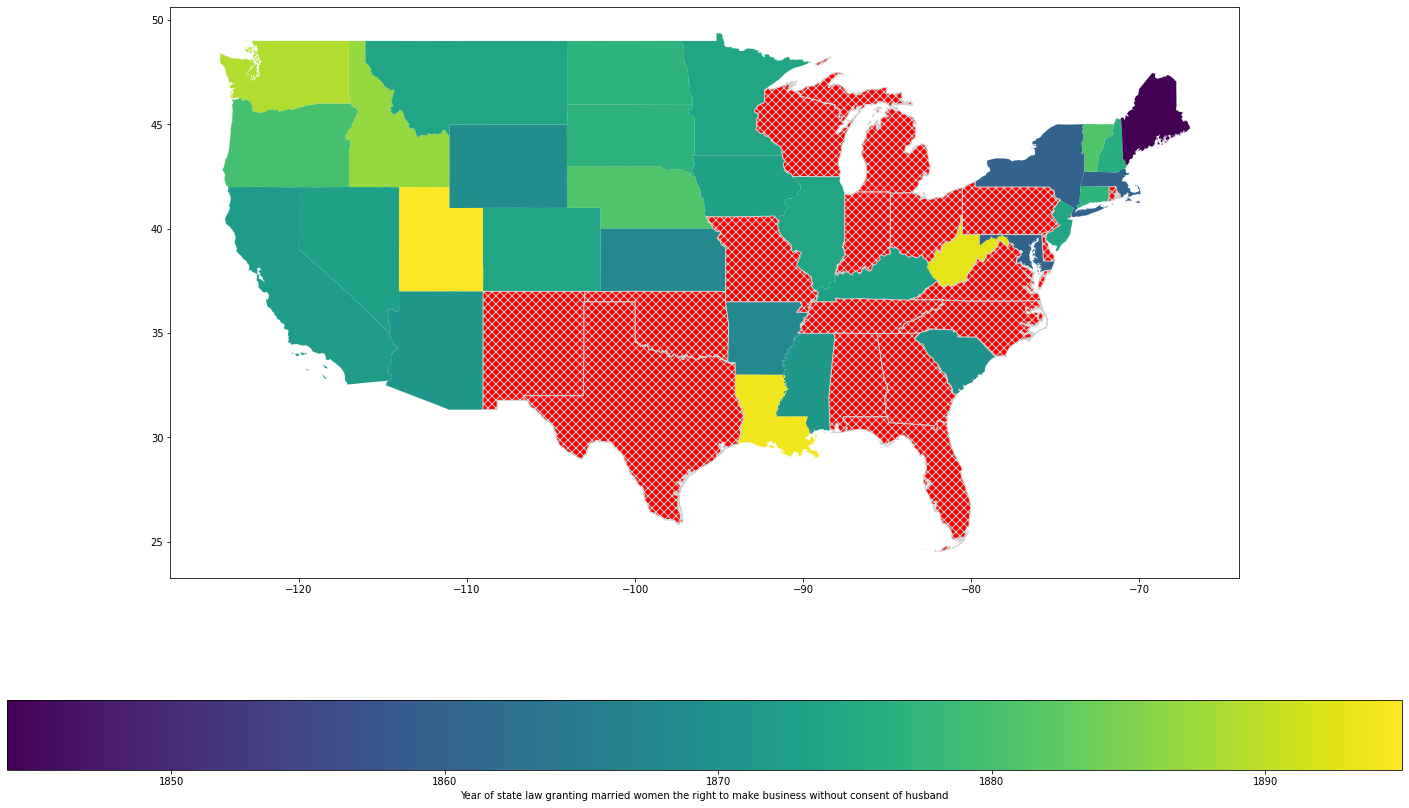

In [16]:
# Choropleth for soletrader column, which describes 
# Year of passage of state law granting married women as a class the right to sign contracts and engage in business without consent of husband
plot_choropleth(label = "Year of state law granting married women the right to make business without consent of husband", column = "soletrader")